In [1]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
try:
    import seaborn as sns
except:
    ! pip install seaborn
    import seaborn as sns

#### Functions

In [2]:
class AnalyzeScheduleResults:
    # initialize
    def __init__(self, df):
        self.df = df
    # plot distributions
    def plot_distributions(self):
        # copy
        df = self.df.copy()
    
        # make lists
        list_pts_home = list(df['home_pts'])
        list_pts_away = list(df['away_pts'])
        
        # home
        flt_mean_home = np.mean(list_pts_home)
        flt_sd_home = np.std(list_pts_home)
        str_label_home = f'Home (Mn = {flt_mean_home:0.2f} +/- SD = {flt_sd_home:0.2f})'
        
        # away
        flt_mean_away = np.mean(list_pts_away)
        flt_sd_away = np.std(list_pts_away)
        str_label_away = f'Away (Mn = {flt_mean_away:0.2f} +/- SD = {flt_sd_away:0.2f})'
        
        # title
        str_title = 'Distribution of Points Scored (Home vs. Away)'
        
        # ax
        fig, ax = plt.subplots(figsize=(9, 5))
        # title
        ax.set_title(str_title)
        # x-label
        ax.set_xlabel('Points')
        # home
        sns.kdeplot(list_pts_home, ax=ax, label=str_label_home)
        # away
        sns.kdeplot(list_pts_away, ax=ax, label=str_label_away)
        # legend
        ax.legend()
        
        # save
        str_filename = 'plt_distribution.png'
        str_local_path = f'{str_dirname_output}/{str_filename}'
        plt.savefig(
            str_local_path,
            bbox_inches='tight',
        )
        
        # show
        plt.show()

#### Constants

In [3]:
str_dirname_output = './output'

#### Output

In [4]:
try:
    os.mkdir(str_dirname_output)
except FileExistsError:
    pass

#### Import data

In [5]:
str_filename = 'df.csv'
str_local_path = f'../01_scrape_schedule_results/output/{str_filename}'
df = pd.read_csv(str_local_path)
# show
df

,week,home_team,home_pts,away_team,away_pts,home_win,away_win,tie
0,1,Philadelphia Eagles,24,Dallas Cowboys,20,1,0,0
1,1,Los Angeles Chargers,27,Kansas City Chiefs,21,1,0,0
2,1,Atlanta Falcons,20,Tampa Bay Buccaneers,23,0,1,0
3,1,Jacksonville Jaguars,26,Carolina Panthers,10,1,0,0
4,1,Cleveland Browns,16,Cincinnati Bengals,17,0,1,0
...,...,...,...,...,...,...,...,...
267,18,Denver Broncos,19,Los Angeles Chargers,3,1,0,0
268,18,Las Vegas Raiders,14,Kansas City Chiefs,12,1,0,0
269,18,New England Patriots,38,Miami Dolphins,10,1,0,0
270,18,Philadelphia Eagles,17,Washington Commanders,24,0,1,0


#### Initialize class

In [6]:
cls_analyze = AnalyzeScheduleResults(
    df=df,
)

#### Plot home vs away points

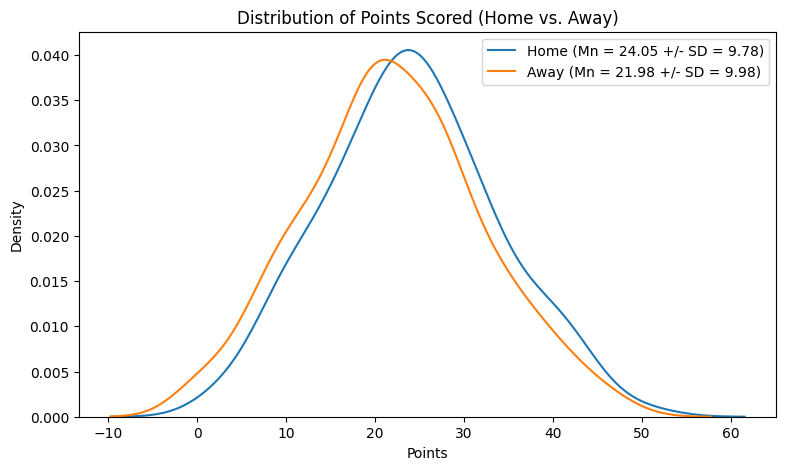

In [7]:
cls_analyze.plot_distributions()